In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
print (pd.options.display.max_columns) # <--- this will display your limit
pd.options.display.max_columns = 500 # this will set limit of columns to 500

20


In [3]:
df=pd.read_excel(r'C:\Users\asifk\Desktop\New folder\POCM_HISTORICAL.xlsx',parse_dates=['Checkout_Date'],index_col='Checkout_Date')

In [4]:
df.head(10)

,Order_Nbr,Item_Nbr,Zip_Code,WSLR_Nbr,Ship_Date,Brand,Partition,Item_Description,Category,Carton_Factor,City,State,Supplier,Lead_Date_in_Weeks,Brand_Code,Cost,Item_Active,Weekly_Avg_Qty_Sold,On_Hand_Inventory,On_Order_Inventory,Pending_WO_Inventory,Remaining_Inventory_Weeks,Order_Quantity,LastModId,LastModMachine,LastModApp,LastModTsp
Checkout_Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-04,100003,5000268,63118,0,2018-12-05,Bud Light - Core,Core,Bud Light Satin Flag,POCM,1,ST LOUIS,MO,IMS,12.0,BDL,12.00,1,NaN,112,0.0,0,22.0,1,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
2018-12-04,100012,1093107,10011,0,2018-12-07,Bud Light - Core,Core,Base Stacker,POCM,1,New York,NY,IMS,10.0,BDL,28.00,0,NaN,0,0.0,0,52.0,1,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
2018-12-05,100030,1090635,20772,0,2018-12-13,Michelob ULTRA - Core +,Core +,NEON - MICHELOB ULTRA,POCM,1,UPPER MARLBORO,MD,IMS,8.0,MUL,93.00,0,NaN,0,0.0,0,52.0,5,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
2018-12-05,100030,5003134,20772,0,2018-12-13,Stella Artois - Super Premium - Import,Import,LED Neon Sign,POCM,1,UPPER MARLBORO,MD,IMS,8.0,STA,80.00,0,NaN,0,0.0,0,52.0,10,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
2018-12-05,100030,5007384,20772,0,2018-12-13,Michelob ULTRA - Core +,Core +,Umbrella,POCM,1,UPPER MARLBORO,MD,IMS,16.0,MUL,41.50,0,NaN,0,0.0,0,52.0,20,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
2018-12-05,100069,1088693,18940,12,2018-12-08,Stella Artois - Super Premium - Import,Import,Stella Artois BAR-SAMPLG,POCM,1,Newton,PA,IMS,8.0,STA,0.01,1,NaN,16870,0.0,0,162.0,10,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
2018-12-05,100095,1090635,42301,31666,2018-12-15,Michelob ULTRA - Core +,Core +,NEON - MICHELOB ULTRA,POCM,1,OWENSBORO,KY,IMS,8.0,MUL,93.00,0,NaN,0,0.0,0,52.0,5,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
2018-12-05,100095,1090712,42301,31666,2018-12-15,Bud Light - Core,Core,Bud Light Opti-Neon,POCM,1,OWENSBORO,KY,IMS,8.0,BDL,110.00,1,NaN,1217,3000.0,3000,62.0,5,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
2018-12-05,100095,1090915,42301,31666,2018-12-15,Budweiser - Core,Core,Budweiser Wrapped Bucket,POCM,25,OWENSBORO,KY,IMS,16.0,BUD,37.50,0,NaN,0,0.0,0,0.0,4,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10


In [5]:
print('Rows     :',df.shape[0])
print('columns  :',df.shape[1])
print('\nFeature  :\n',df.columns.tolist())
print('\nMissing_values :',df.isnull().sum())
print('\nUnique_values  :',df.nunique())

Rows     : 160577
columns  : 27

Feature  :
 ['Order_Nbr', 'Item_Nbr', 'Zip_Code', 'WSLR_Nbr', 'Ship_Date', 'Brand', 'Partition', 'Item_Description', 'Category', 'Carton_Factor', 'City', 'State', 'Supplier', 'Lead_Date_in_Weeks', 'Brand_Code', 'Cost', 'Item_Active', 'Weekly_Avg_Qty_Sold', 'On_Hand_Inventory', 'On_Order_Inventory', 'Pending_WO_Inventory', 'Remaining_Inventory_Weeks', 'Order_Quantity', 'LastModId', 'LastModMachine', 'LastModApp', 'LastModTsp']

Missing_values : Order_Nbr                         0
Item_Nbr                          0
Zip_Code                          0
WSLR_Nbr                          0
Ship_Date                     28161
Brand                             0
Partition                      4086
Item_Description                  0
Category                          0
Carton_Factor                     0
City                              1
State                            18
Supplier                          0
Lead_Date_in_Weeks               44
Brand_Code     

#### By observing the above data it clear that there are many missing values in the data set 

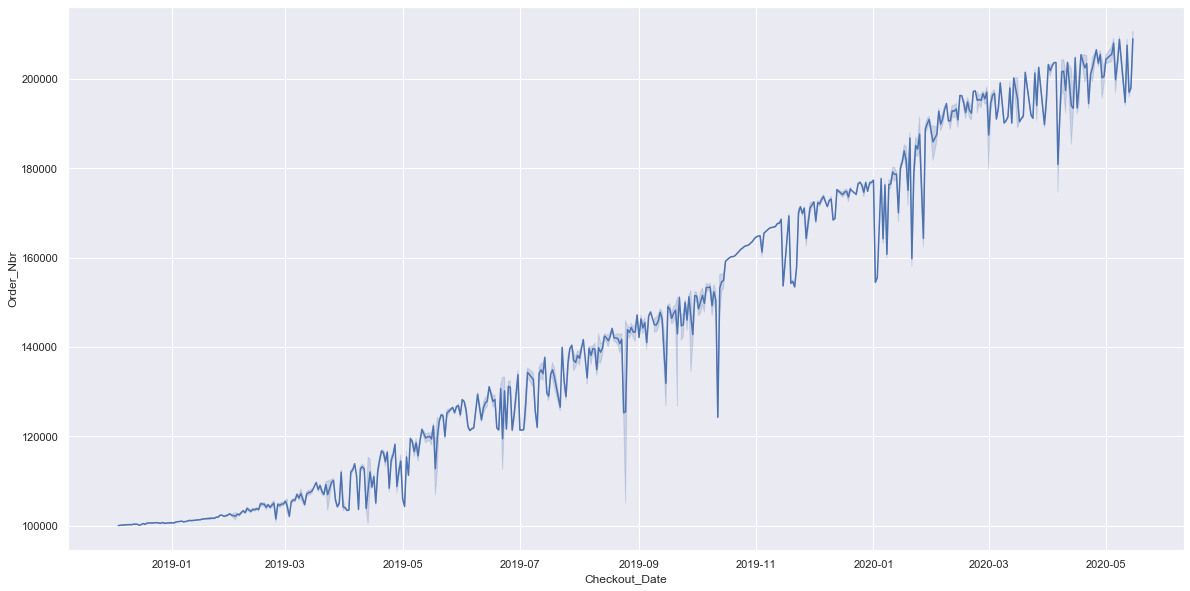

In [6]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x=df.index,y='Order_Nbr',data=df)

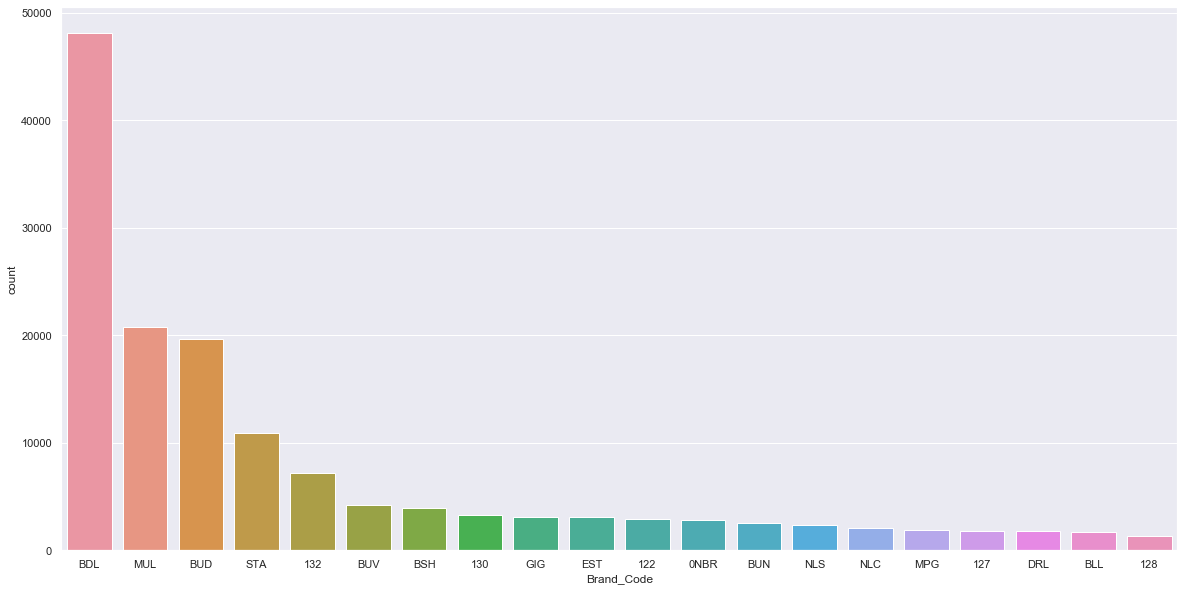

In [7]:
sns.countplot('Brand_Code',data=df,order=df.Brand_Code.value_counts().iloc[:20].index)

#### Top 20 Brand , only top 5 have more sales when compare to other 

#### The model may not have good accuracy amony the low sales brand  

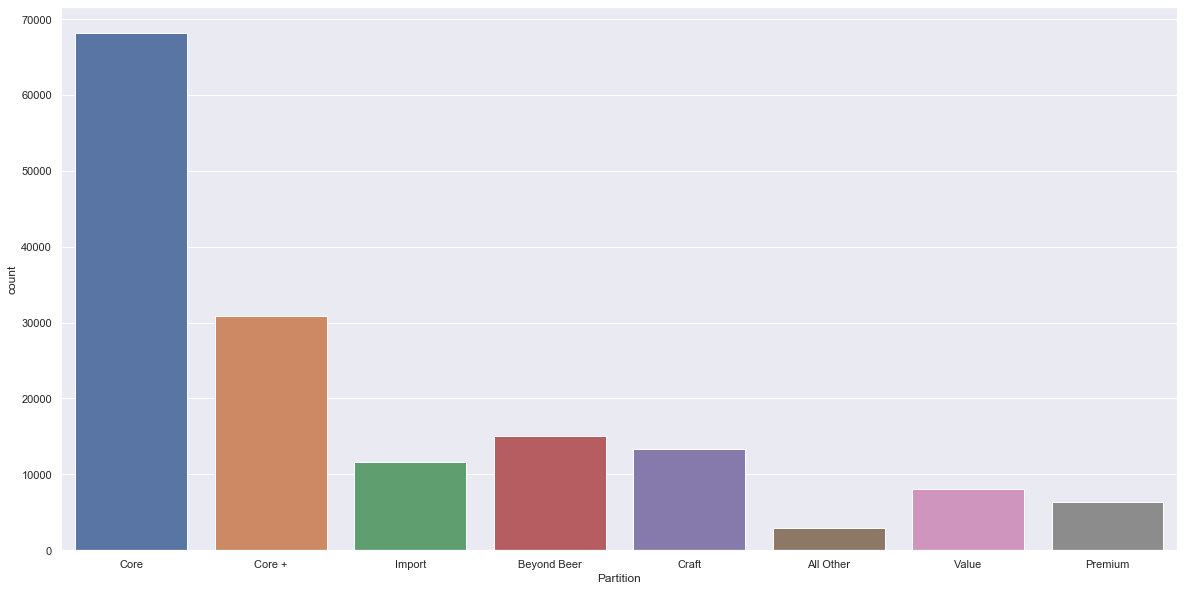

In [8]:
sns.countplot(x='Partition',data=df)

In [9]:
core=df.loc[df['Partition']=='Core']

In [10]:
core['Brand'].value_counts()

Bud Light - Core                      48149
Budweiser - Core                      19615
Michelob Golden Draft Light - Core      237
Budweiser Select - Core                 165
Montejo - Core                           28
Kokanee - Core                           11
Michelob - Core                           5
SELECT 55 - Core                          4
Michelob Golden Draft - Core              2
Name: Brand, dtype: int64

## Forecasting  brand Bud Light - Core

In [11]:
bdl_df=df.loc[df['Brand_Code']=='BDL']

In [12]:
bdl_df.head()

,Order_Nbr,Item_Nbr,Zip_Code,WSLR_Nbr,Ship_Date,Brand,Partition,Item_Description,Category,Carton_Factor,City,State,Supplier,Lead_Date_in_Weeks,Brand_Code,Cost,Item_Active,Weekly_Avg_Qty_Sold,On_Hand_Inventory,On_Order_Inventory,Pending_WO_Inventory,Remaining_Inventory_Weeks,Order_Quantity,LastModId,LastModMachine,LastModApp,LastModTsp
Checkout_Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-04,100003,5000268,63118,0,2018-12-05,Bud Light - Core,Core,Bud Light Satin Flag,POCM,1,ST LOUIS,MO,IMS,12.0,BDL,12.0,1,NaN,112,0.0,0,22.0,1,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
2018-12-04,100012,1093107,10011,0,2018-12-07,Bud Light - Core,Core,Base Stacker,POCM,1,New York,NY,IMS,10.0,BDL,28.0,0,NaN,0,0.0,0,52.0,1,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
2018-12-05,100095,1090712,42301,31666,2018-12-15,Bud Light - Core,Core,Bud Light Opti-Neon,POCM,1,OWENSBORO,KY,IMS,8.0,BDL,110.0,1,NaN,1217,3000.0,3000,62.0,5,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
2018-12-06,100143,1090721,63118,0,2018-12-11,Bud Light - Core,Core,Bud Light Small Tap Handle,POCM,1,ST LOUIS,MO,IMS,16.0,BDL,18.0,1,NaN,459,0.0,0,38.0,2,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
2018-12-06,100159,5001579,33801,40919,2018-12-11,Bud Light - Core,Core,Small Spectacular - Paper Lantern,POCM,2,Lakeland,FL,IMS,6.0,BDL,11.5,0,NaN,0,0.0,0,52.0,6,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10


## EDA for Bud Light - Core

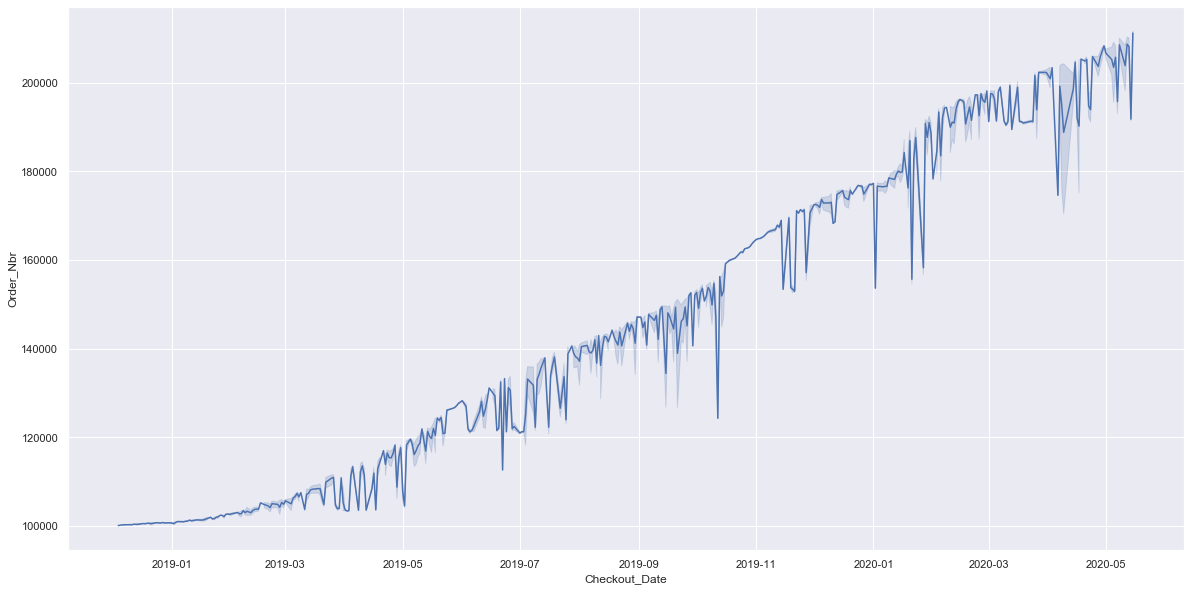

In [13]:
sns.lineplot(x=bdl_df.index,y='Order_Nbr',data=bdl_df)

### The trend is similar to the total data , it the upword trend 

In [14]:
bdl_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48149 entries, 2018-12-04 to 2020-05-15
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Order_Nbr                  48149 non-null  int64         
 1   Item_Nbr                   48149 non-null  object        
 2   Zip_Code                   48149 non-null  object        
 3   WSLR_Nbr                   48149 non-null  int64         
 4   Ship_Date                  39551 non-null  datetime64[ns]
 5   Brand                      48149 non-null  object        
 6   Partition                  48149 non-null  object        
 7   Item_Description           48149 non-null  object        
 8   Category                   48149 non-null  object        
 9   Carton_Factor              48149 non-null  int64         
 10  City                       48149 non-null  object        
 11  State                      48141 non-null  object 

#### Dividing the data between numerical and categorical data

In [114]:
numeric_data = bdl_df.select_dtypes(include=[np.number])
categorical_data = bdl_df.select_dtypes(exclude=[np.number])

In [115]:
numeric_data

,Order_Nbr,WSLR_Nbr,Carton_Factor,Lead_Date_in_Weeks,Cost,Item_Active,Weekly_Avg_Qty_Sold,On_Hand_Inventory,On_Order_Inventory,Pending_WO_Inventory,Remaining_Inventory_Weeks,Order_Quantity
Checkout_Date,,,,,,,,,,,,
2018-12-04,100003,0,1,12.0,12.0,1,NaN,112,0.0,0,22.0,1
2018-12-04,100012,0,1,10.0,28.0,0,NaN,0,0.0,0,52.0,1
2018-12-05,100095,31666,1,8.0,110.0,1,NaN,1217,3000.0,3000,62.0,5
2018-12-06,100143,0,1,16.0,18.0,1,NaN,459,0.0,0,38.0,2
2018-12-06,100159,40919,2,6.0,11.5,0,NaN,0,0.0,0,52.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-15,211583,30134,1,8.0,170.0,1,14.0,208,0.0,0,14.0,1
2020-05-15,211597,32464,25,16.0,37.5,1,13.0,4655,1000.0,1000,435.0,4
2020-05-15,211651,24804,1,16.0,38.0,1,160.0,927,1000.0,1000,12.0,15


In [69]:
print(numeric_data.isnull().sum())
print('Total data = ',len(numeric_data))

Order_Nbr                        0
WSLR_Nbr                         0
Carton_Factor                    0
Lead_Date_in_Weeks               0
Cost                             0
Item_Active                      0
Weekly_Avg_Qty_Sold          40417
On_Hand_Inventory                0
On_Order_Inventory           33938
Pending_WO_Inventory             0
Remaining_Inventory_Weeks     7025
Order_Quantity                   0
dtype: int64
Total data =  48149


#### "Weekly_Avg_Qty_Sold" and "On_Order_Inventory" have < 75% of null data point , 

#### So it's better to drop those two columns

In [116]:
numeric_data.drop(['On_Order_Inventory','Weekly_Avg_Qty_Sold'],axis='columns', inplace=True)

In [117]:
numeric_data.head()

,Order_Nbr,WSLR_Nbr,Carton_Factor,Lead_Date_in_Weeks,Cost,Item_Active,On_Hand_Inventory,Pending_WO_Inventory,Remaining_Inventory_Weeks,Order_Quantity
Checkout_Date,,,,,,,,,,
2018-12-04,100003,0,1,12.0,12.0,1,112,0,22.0,1
2018-12-04,100012,0,1,10.0,28.0,0,0,0,52.0,1
2018-12-05,100095,31666,1,8.0,110.0,1,1217,3000,62.0,5
2018-12-06,100143,0,1,16.0,18.0,1,459,0,38.0,2
2018-12-06,100159,40919,2,6.0,11.5,0,0,0,52.0,6


In [118]:
numeric_data['Remaining_Inventory_Weeks'].isnull().any()

True

In [119]:
numeric_data['Remaining_Inventory_Weeks'].median()

52.0

In [120]:
numeric_data['Remaining_Inventory_Weeks'].replace(np.nan,numeric_data['Remaining_Inventory_Weeks'].median(),inplace=True)

In [121]:
numeric_data['Remaining_Inventory_Weeks'].isnull().any()

False

In [209]:
numeric_data.shape

(48149, 10)

In [130]:
categorical_data.head()

,Item_Nbr,Zip_Code,Ship_Date,Brand,Partition,Item_Description,Category,City,State,Supplier,Brand_Code,LastModId,LastModMachine,LastModApp,LastModTsp
Checkout_Date,,,,,,,,,,,,,,,
2018-12-04,5000268,63118,2018-12-05,Bud Light - Core,Core,Bud Light Satin Flag,POCM,ST LOUIS,MO,IMS,BDL,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
2018-12-04,1093107,10011,2018-12-07,Bud Light - Core,Core,Base Stacker,POCM,New York,NY,IMS,BDL,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
2018-12-05,1090712,42301,2018-12-15,Bud Light - Core,Core,Bud Light Opti-Neon,POCM,OWENSBORO,KY,IMS,BDL,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
2018-12-06,1090721,63118,2018-12-11,Bud Light - Core,Core,Bud Light Small Tap Handle,POCM,ST LOUIS,MO,IMS,BDL,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
2018-12-06,5001579,33801,2018-12-11,Bud Light - Core,Core,Small Spectacular - Paper Lantern,POCM,Lakeland,FL,IMS,BDL,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10


In [131]:
print(categorical_data.isnull().sum())
print('Total data = ',len(categorical_data))

Item_Nbr               0
Zip_Code               0
Ship_Date           8598
Brand                  0
Partition              0
Item_Description       0
Category               0
City                   0
State                  8
Supplier               0
Brand_Code             0
LastModId              0
LastModMachine         0
LastModApp             0
LastModTsp             0
dtype: int64
Total data =  48149


In [132]:
categorical_data.drop(['Ship_Date'],axis='columns', inplace=True)

In [136]:
categorical_data['Item_Nbr'] = categorical_data['Item_Nbr'].astype(float)

In [140]:
categorical_data['Item_Nbr'] = categorical_data['Item_Nbr'].astype(int)

In [141]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
le=LabelEncoder()
oe=OneHotEncoder()

In [144]:
categorical_data['Brand'].value_counts()

0    48149
Name: Brand, dtype: int64

In [143]:
categorical_data['Brand']= le.fit_transform(categorical_data['Brand']) 

In [176]:
categorical_data['LastModTsp'].value_counts().head()

2020-04-28 14:55:10    40086
2020-04-28 10:41:04     3669
2020-04-28 10:41:06     2379
2020-04-28 10:41:05     1270
2020-05-15 14:41:08      303
Name: LastModTsp, dtype: int64

In [164]:
categorical_data['Brand_Code'].dtype

dtype('O')

In [183]:
# categorical_data['Zip_Code']= le.fit_transform(categorical_data['Zip_Code']) 

In [175]:
categorical_data['LastModApp']=pd.get_dummies(categorical_data['LastModApp'],drop_first=True)

In [213]:
categorical_data

,Item_Nbr,Item_Description,City,State,Supplier,LastModId,LastModApp,LastModTsp
Checkout_Date,,,,,,,,
2018-12-04,5000268,369,795,25,1,0,1,4
2018-12-04,1093107,18,616,35,1,0,1,4
2018-12-05,1090712,327,642,18,1,0,1,4
2018-12-06,1090721,400,795,25,1,0,1,4
2018-12-06,5001579,862,480,9,1,0,1,4
...,...,...,...,...,...,...,...,...
2020-05-15,5007172,340,209,1,1,1,0,5
2020-05-15,5007049,508,603,25,1,1,0,5
2020-05-15,5010824,260,16,50,1,1,0,5


In [185]:
categorical_data.drop(['Brand','Partition','Category','Brand_Code','LastModMachine'],axis='columns', inplace=True)

In [216]:
print(categorical_data.shape)
print(numeric_data.shape)

(48149, 8)
(48149, 10)


In [ ]:
categorical_data.to_csv(r'Path where you want to store the exported CSV file\categorical_data_bdl.csv')